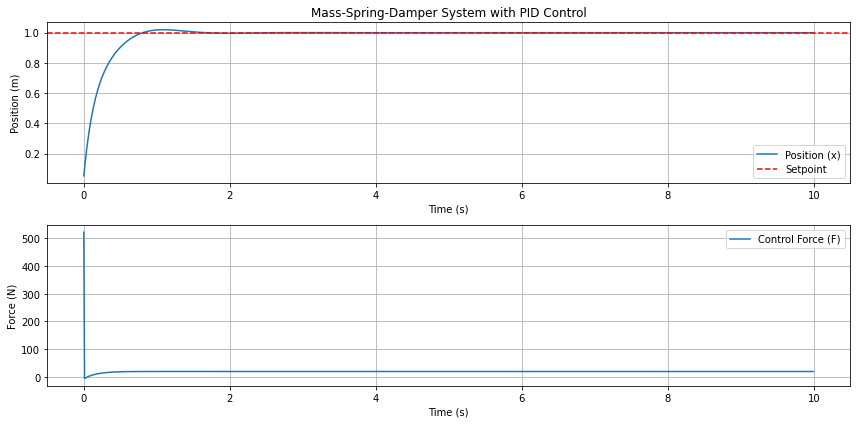

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# System Parameters
m = 1.0  # Mass (kg)
c = 5.0  # Damping coefficient (N·s/m)
k = 20.0  # Spring constant (N/m)
dt = 0.01  # Time step (s)
t_end = 10  # Simulation time (s)

# PID Parameters
Kp = 20.0  # Proportional gain
Ki = 100.0    # Integral gain
Kd = 5.0   # Derivative gain

# Initial Conditions
x = 0.0     # Initial position (m)
x_dot = 0.0 # Initial velocity (m/s)
x_setpoint = 1.0  # Desired position (m)

# Simulation variables
time = np.arange(0, t_end, dt)
x_vals = []  # Position history
force_vals = []  # Control force history

# PID variables
integral = 0.0
previous_error = 0.0

# Simulation Loop
for t in time:
    # Error
    error = x_setpoint - x
    
    # PID control
    integral += error * dt
    derivative = (error - previous_error) / dt
    force = Kp * error + Ki * integral + Kd * derivative
    previous_error = error
    
    # System dynamics
    x_ddot = (force - c * x_dot - k * x) / m
    x_dot += x_ddot * dt
    x += x_dot * dt
    
    # Record data
    x_vals.append(x)
    force_vals.append(force)

# Plot results
plt.figure(figsize=(12, 6))

# Plot position
plt.subplot(2, 1, 1)
plt.plot(time, x_vals, label="Position (x)")
plt.axhline(x_setpoint, color='r', linestyle='--', label="Setpoint")
plt.title("Mass-Spring-Damper System with PID Control")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()

# Plot control force
plt.subplot(2, 1, 2)
plt.plot(time, force_vals, label="Control Force (F)")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
